In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#from sklearn import svm
from sklearn.metrics import roc_curve, auc
from itertools import product
import matplotlib.pyplot as plt

#import pysal as ps # Wczytanie danych z pliku dbf

## Klasyfikacja

Klasyfikacja zalicza się do metod uczenia nadzorowanego (ang. supervised learning). Zbiór (macierz) danych w tym przypadku składa się z obiektów charakteryzujących się atrybutami opisującymi i atrybutem decyzyjnym. Przyjmuje się przy tym, że pomiędzy atrybutami opisującymi, a atrybutem decyzyjnym zachodzi pewien związek przyczynowo-skutkowy zaś kategoryczny atrybut decyzyjny określa klasę do której przynależy obiekt. Zbiór danych jest traktowany jako źródło wiedzy na podstawie którego określa się rodzaj klasyfikatora, a następnie dobiera jego parametry w tzw. procesie uczenia. Gotowy klasyfikator może następnie zostać wykorzystany do określenia przynależności obiektu dla którego znane są jedynie wartości atrybutów opisujących do właściwej klasy. 

Z reguły w celu sprawdzenia poprawności danego algorytmu i sprawdzenia jego skuteczności dla danego zadania klasyfikacji podział zbioru danych wykonywany jest na zbiór uczący i testowy (najczęściej w proporcjach 80/20 lub 70/30). Czasem jednak w przypadku testowania algorytmów i ich dostrajania stosuje się podział 60/20/20, a poszczególne części stanową zbiory odpowiednio: treningowy, walidacyjny i testowy. 

W tym notatniku skupimy się na klasyfikacji metodą **SVM**.


Wygenerujemy teraz nowy zbiór z klastrami bardziej się nakładającymi

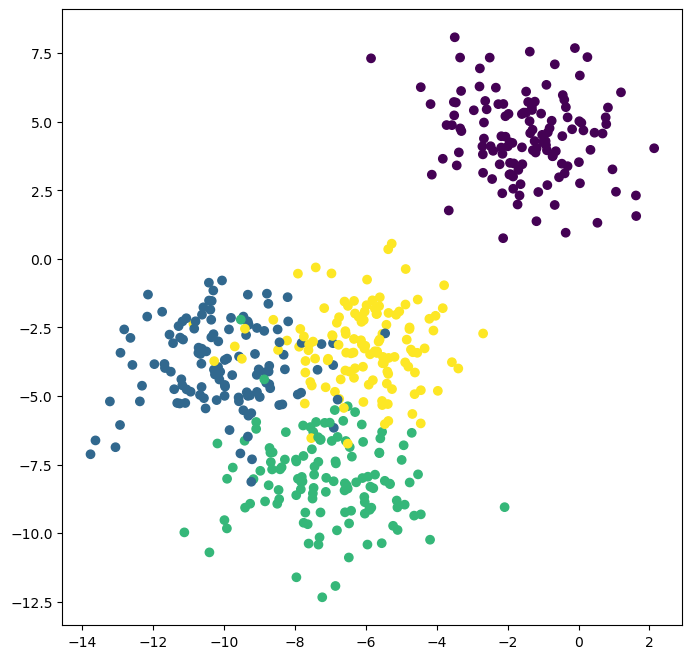

In [2]:
from sklearn.datasets import make_blobs
X3, y3 = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1.5,
                  center_box=(-10.0, 10.0),
                  shuffle=True,    # przetasowanie kolejności próbek
                  random_state=1)  # ustawienie momentu startu zmiennej pseudolosowej w celu zapewnienia powtarzalności wyników
columns = ['feature' + str(x) for x in np.arange(1, X3.shape[1]+1, 1)]
d = {key: values for key, values in zip(columns, X3.T)}
d['label'] = y3
dane3 = pd.DataFrame(d).reindex(columns=columns+['label'])

#Wyświelenie blobów
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(dane3.feature1, dane3.feature2, marker='o', c=dane3.label)

Miara $f_1 = 2*\frac{precyzja * czułość}{precyzja+czułość}$. 

Precyzja jest miarą wskazującą z jaką pewnością możemy ufać przewidywaniom pozytywnym: $precyzja = \frac{TP}{TP+FP}$  

Czułość jest miarą wskazującą w jakim procencie klasa faktycznie pozytywna została pokryta przewidywaniem pozytywnym: $czułość = \frac{TP}{TP+FN}$ 


### SVM
Metoda wektorów nośnych/SVM z ang. Support Vector Machine jest algorytmem, którego zadaniem jest podzielenie przestrzeni cech przy pomocy wektorów nośnych. W przypadku 2 cech, które można zobrazować na wykresie płaskim, są to po proste (w przypadku jądra liniowego) lub wielomiany lub funkcja Gaussa (w przypadku jąder radialnych). Jądra liniowe są szybkie i proste w użyciu, jednakże nadają się do klasyfikacji obszarów wyraźnie od siebie odstających. W celu dokładnego wyodrębnienia obszarów należy użyć jąder radialnych, uważając na przeuczenie klasyfikatora.   

,feature1,feature2,label
0,-10.785289,1.728062,1
1,-6.342566,9.911338,0
2,-14.431693,-3.683509,1
3,10.389289,-6.023495,0
4,-4.118290,-5.106990,1
...,...,...,...
495,-13.098551,-3.460073,1
496,-3.288403,-10.189205,1
497,-10.095709,-7.254112,1
498,-6.396800,8.117403,0


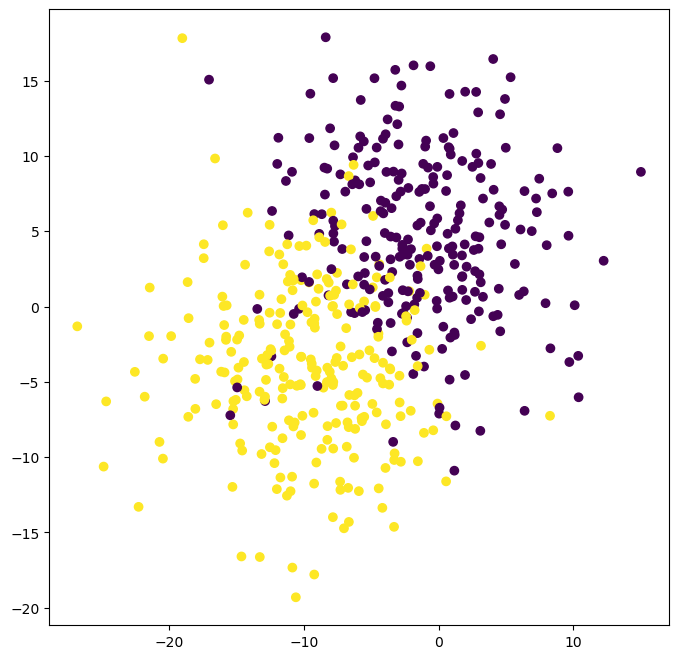

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
X3, y3 = make_blobs(n_samples=500,
                  n_features=2,
                  centers=2,
                  cluster_std=5.5,
                  center_box=(-10.0, 10.0),
                  shuffle=True,    # przetasowanie kolejności próbek
                  random_state=1)  # ustawienie momentu startu zmiennej pseudolosowej w celu zapewnienia powtarzalności wyników
columns = ['feature' + str(x) for x in np.arange(1, X3.shape[1]+1, 1)]
d = {key: values for key, values in zip(columns, X3.T)}
d['label'] = y3
dane3 = pd.DataFrame(d).reindex(columns=columns+['label'])

#Wyświelenie blobów
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(dane3.feature1, dane3.feature2, marker='o', c=dane3.label)

dane3

In [ ]:
from sklearn import svm
h = .02  # step size in the mesh
cechy = columns
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(dane3[cechy], dane3['label'])
rbf_svc = svm.SVC(kernel='rbf', gamma=2).fit(dane3[cechy], dane3['label'])
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(dane3[cechy], dane3['label'])
lin_svc = svm.LinearSVC(C=C).fit(dane3[cechy], dane3['label'])

# create a mesh to plot in
x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVM z jadrem liniowym',
          'LinearSVC (jadro liniowe)',
          'SVM z jadrem RBF',
          'SVM z jadrem wielomianowym (stopnia 3)']

plt.figure(figsize=(10,10))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

## Liniowe SVM

W pakiecie sklearn dostępne są dwa linowe modele svm.SVC i svm.LinearSVC.

### Zadanie 1

Dla klasyfikatorów liniowego svm.SVC przeprowadź testy doboru współczynnika regularyzacji C dla wartości [0.01, 0.1, 1, 10, 100, 1000]. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. Na podstawie otrzymanych wyników określ najlepszą wartość współczynnika C.

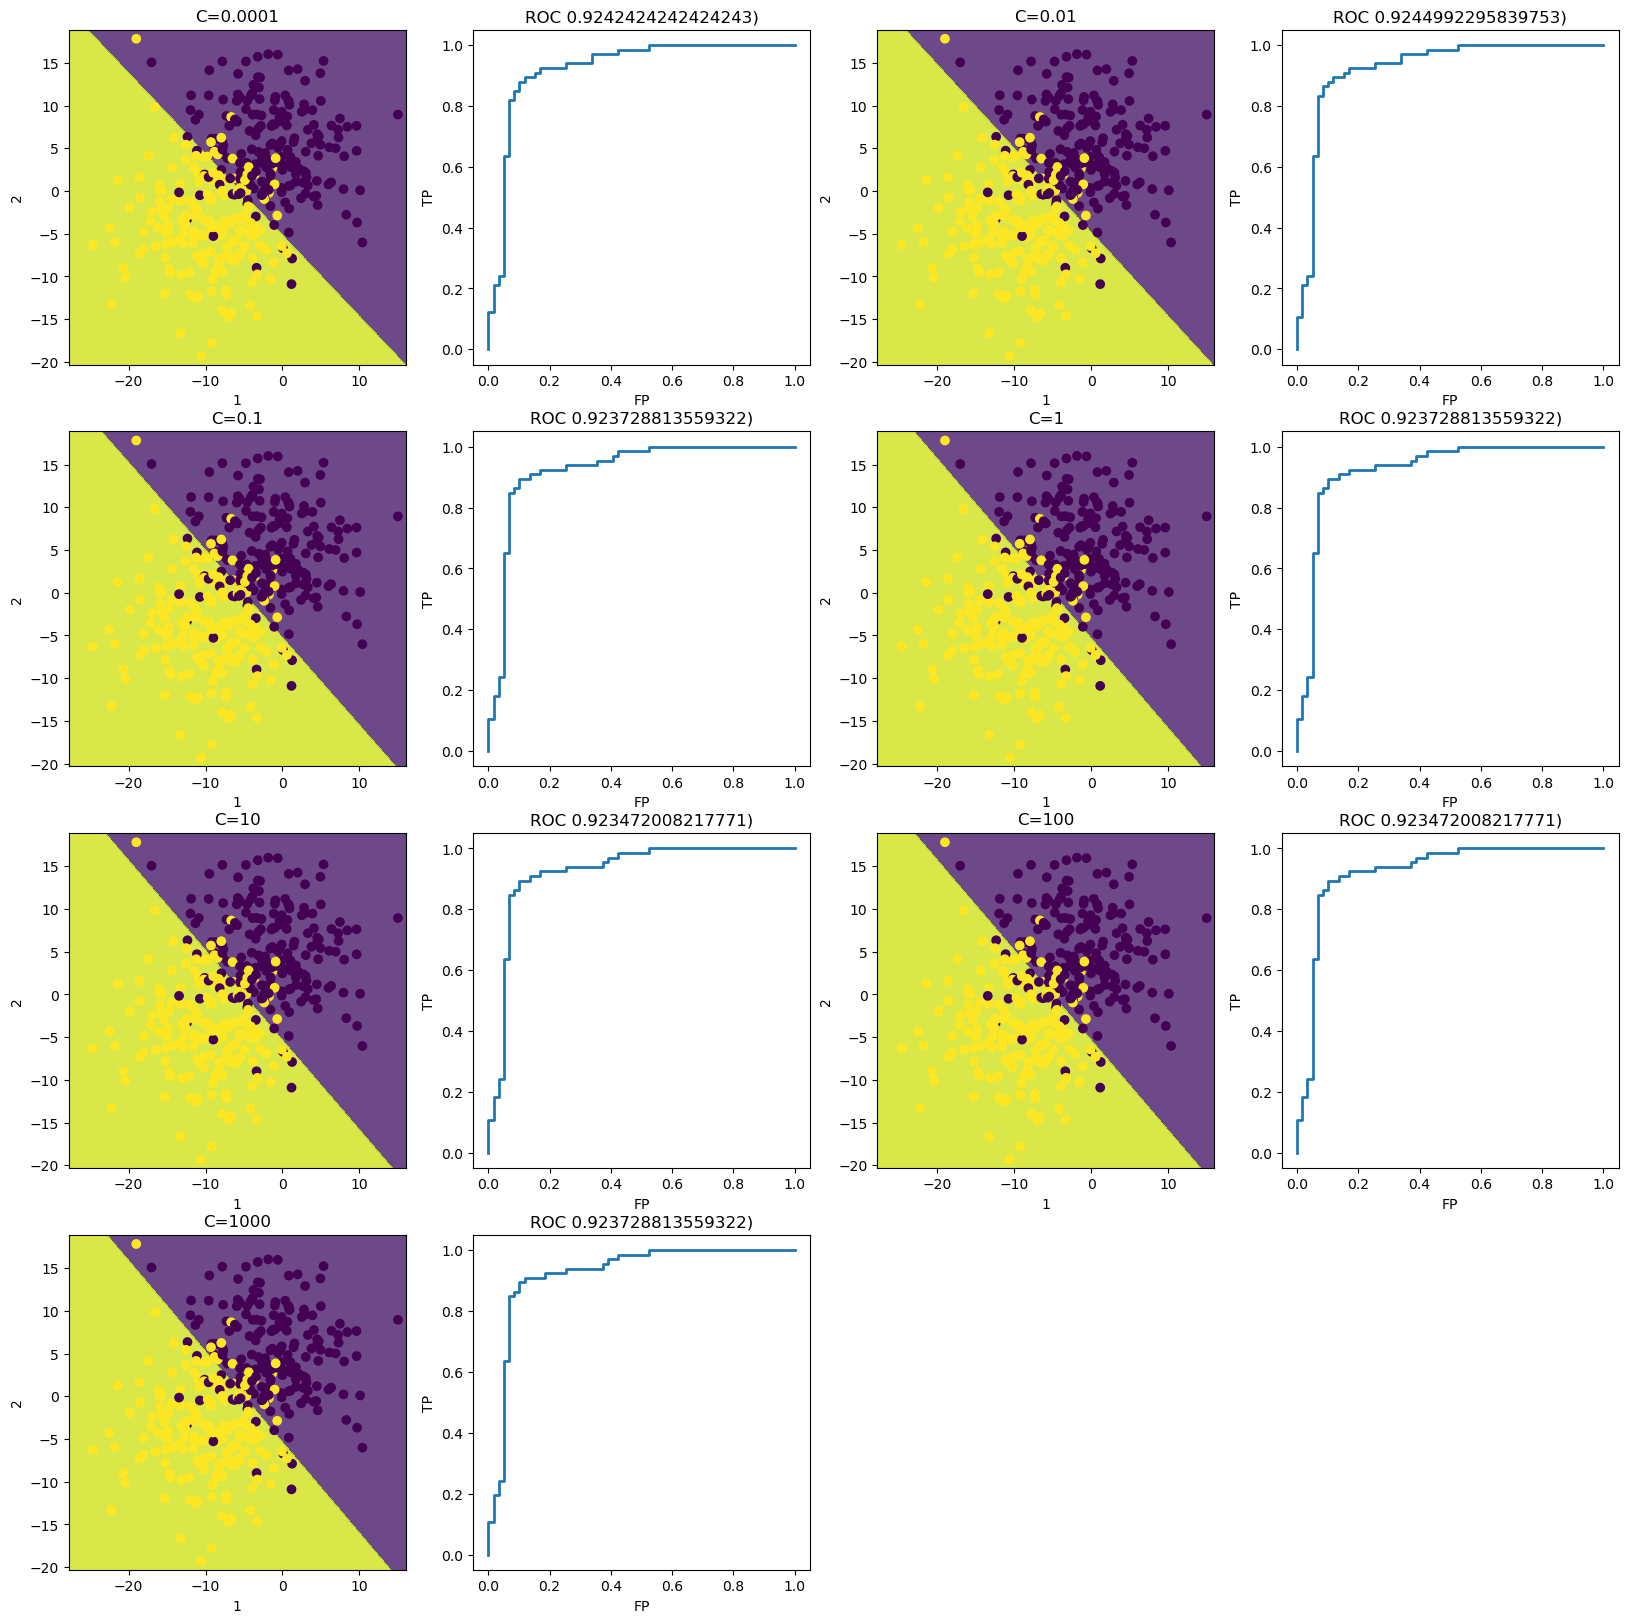

In [10]:
wspolczynnik_c = [0.0001, 0.01, 0.1, 1, 10, 100, 1000]
X4 = X3
y4 = y3
X_train, X_test, y_train, y_test = train_test_split(X4, y4)

ilosc_rzedow = 4

plt.figure(figsize=(20, 20))
for i, c in enumerate(wspolczynnik_c):
    svc = svm.SVC(kernel='linear', C=c, random_state=0)
    y_score = svc.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    area = auc(fpr, tpr)

    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(4, 4, (2*i) + 1)
    plt.xlabel('1')
    plt.ylabel('2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'C={c}')

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

    plt.subplot(4, 4, (2*i) + 2)
    plt.xlabel('FP')
    plt.ylabel('TP')
    plt.title(f'ROC {area})')
 
    plt.plot(fpr, tpr, lw=2)

plt.show()

Dla wszystkich współczynników C wyniki są bardzo podobne, najlepsze ROC uzyskujemy dla współczynnika C = 0.01

### Zadanie 2

Dla klasyfikatorów liniowego svm.LinearSVC przeprowadź testy doboru współczynnika regularyzacji C dla wartości [0.01, 0.1, 1, 10, 100, 1000]. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. Na podstawie otrzymanych wyników określ najlepszą wartość współczynnika C.

D:\Users\daria\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Users\daria\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Users\daria\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Users\daria\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Users\daria\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


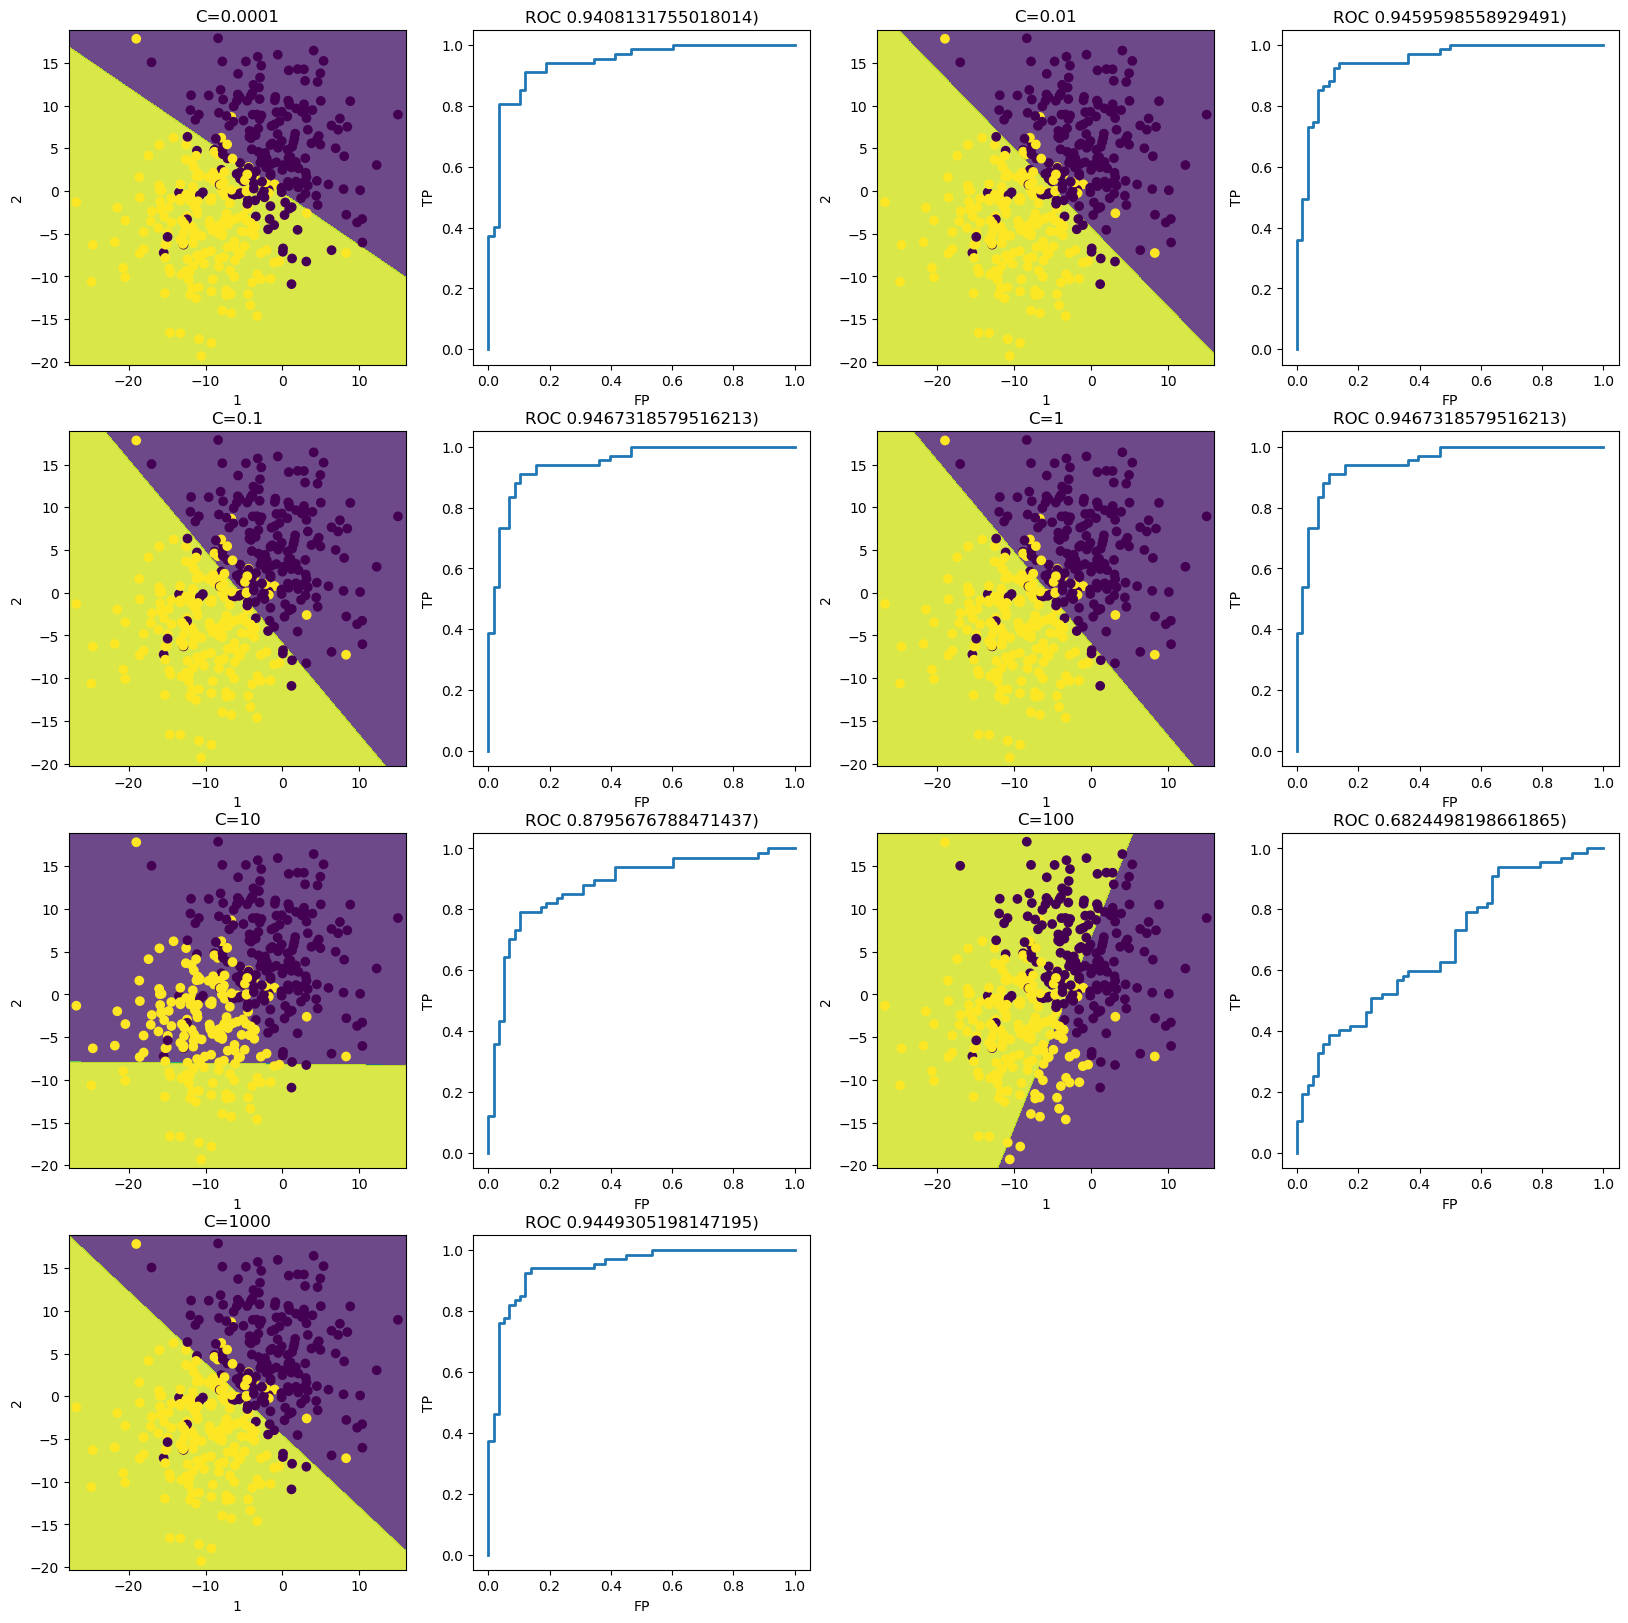

In [11]:
wspolczynnik_c = [0.0001, 0.01, 0.1, 1, 10, 100, 1000]
X4 = X3
y4 = y3
X_train, X_test, y_train, y_test = train_test_split(X4, y4)

ilosc_rzedow = 4

plt.figure(figsize=(20, 20))
for i, c in enumerate(wspolczynnik_c):
    svc = svm.LinearSVC(C=c, random_state=0)
    y_score = svc.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    area = auc(fpr, tpr)

    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(4, 4, (2*i) + 1)
    plt.xlabel('1')
    plt.ylabel('2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'C={c}')

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

    plt.subplot(4, 4, (2*i) + 2)
    plt.xlabel('FP')
    plt.ylabel('TP')
    plt.title(f'ROC {area})')
 
    plt.plot(fpr, tpr, lw=2)

plt.show()

Najgorsze wyniki zostały uzyskane dla C = 100, gdzie pole zbliża się do 0.5, jeżeli by przekroczyło tą wartość to klasyfikator byłby gorszy niż rzut losowy, wykres nie odwzorowuje podziału na klasy. Najlepsze wartości udało się uzyskać dla wartości C = 0.1 i C = 1. Można zauważyć że czas wykonania kodu był szybszy 

### Zadanie 3

Dla klasyfikatorów SVM z jądrem wielomianowym dokonaj doboru stopnia wielomianu i współczynnika regularyzacji C. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. 

0.1 2
0.1 4
0.1 6
1 2
1 4
1 6
10 2
10 4
10 6


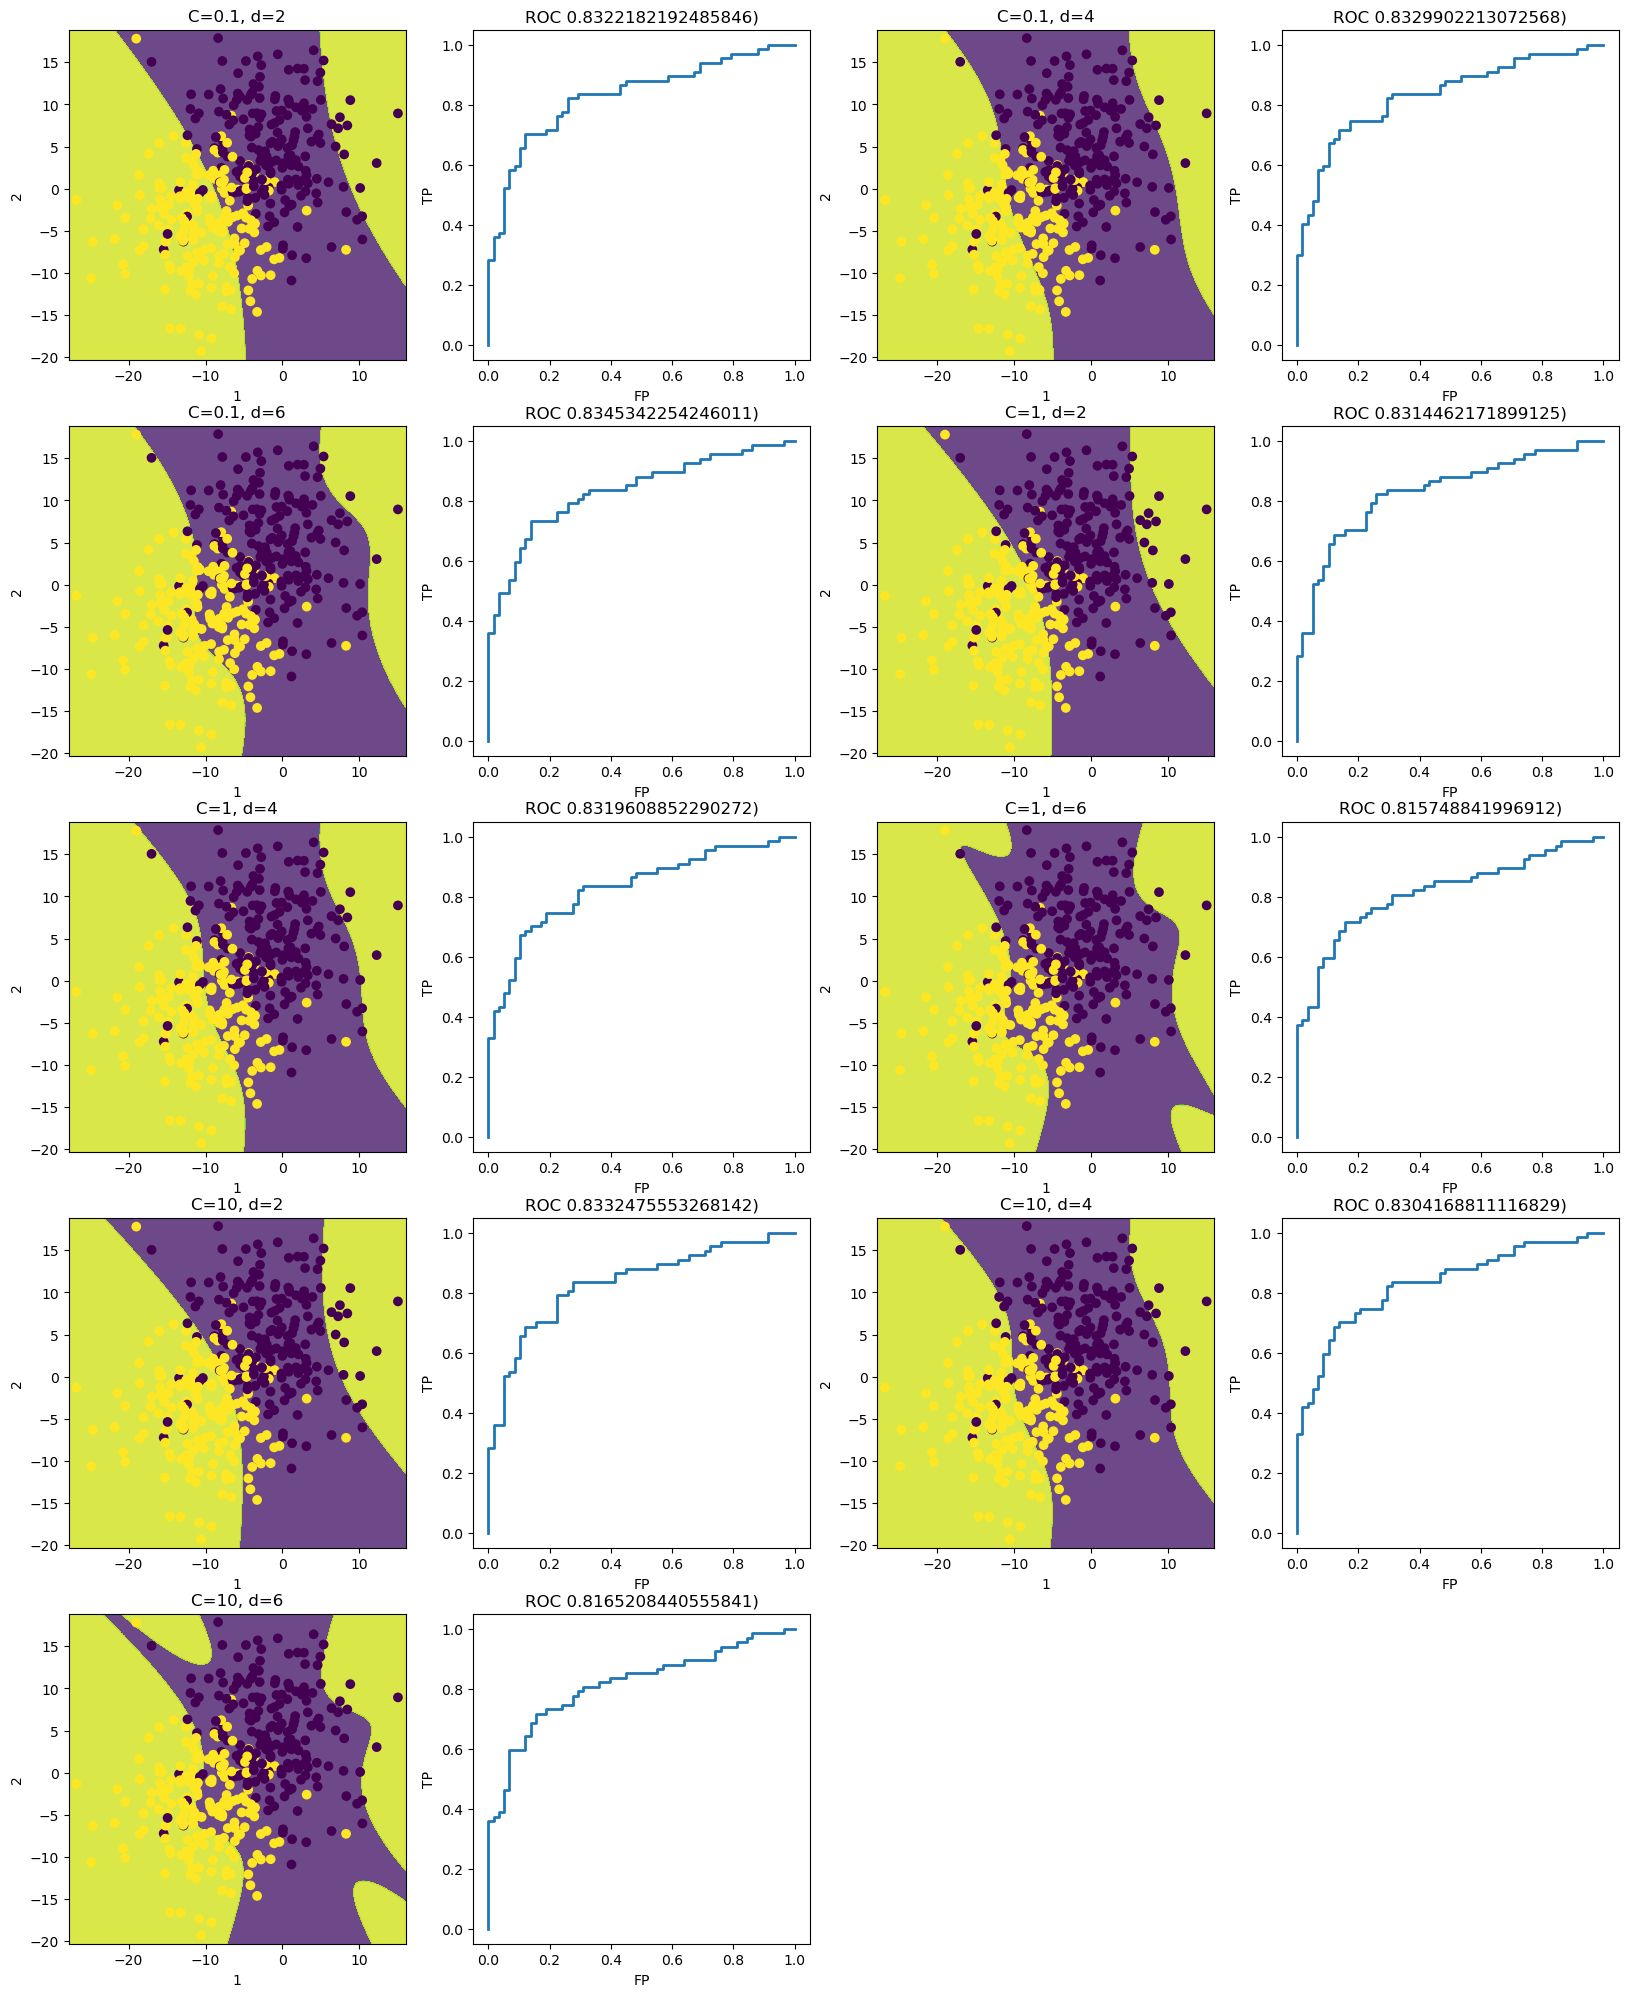

In [15]:
wspolczynnik_c = [0.1, 1, 10]
stopien = [2, 4, 6]

plt.figure(figsize=(20, 30))
for i, (c, d) in enumerate(product(wspolczynnik_c, stopien)):
    print(f'{c} {d}')
    svc = svm.SVC(kernel='poly', degree=d, C=c)
    y_score = svc.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    area = auc(fpr, tpr)

    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(5, 4, (2*i) + 1)
    plt.xlabel('1')
    plt.ylabel('2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'C={c}, d={d}')

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
    
    plt.subplot(5, 4, (2*i) + 2)
    plt.xlabel('FP')
    plt.ylabel('TP')
    plt.title(f'ROC {area})')

    plt.plot(fpr, tpr, lw=2)

plt.show()

Najlepszy wynik obserwujemy dla C = 0.1 i d = 6

### Zadanie 4

Dla klasyfikatorów SVM z jądrem Gaussa dokonaj doboru współczynnika wariancji. Pokaż granice decyzyjne dla kilku wybranych współczynników oraz wykreśl krzywe ROC. 

0.01
0.1
1
10


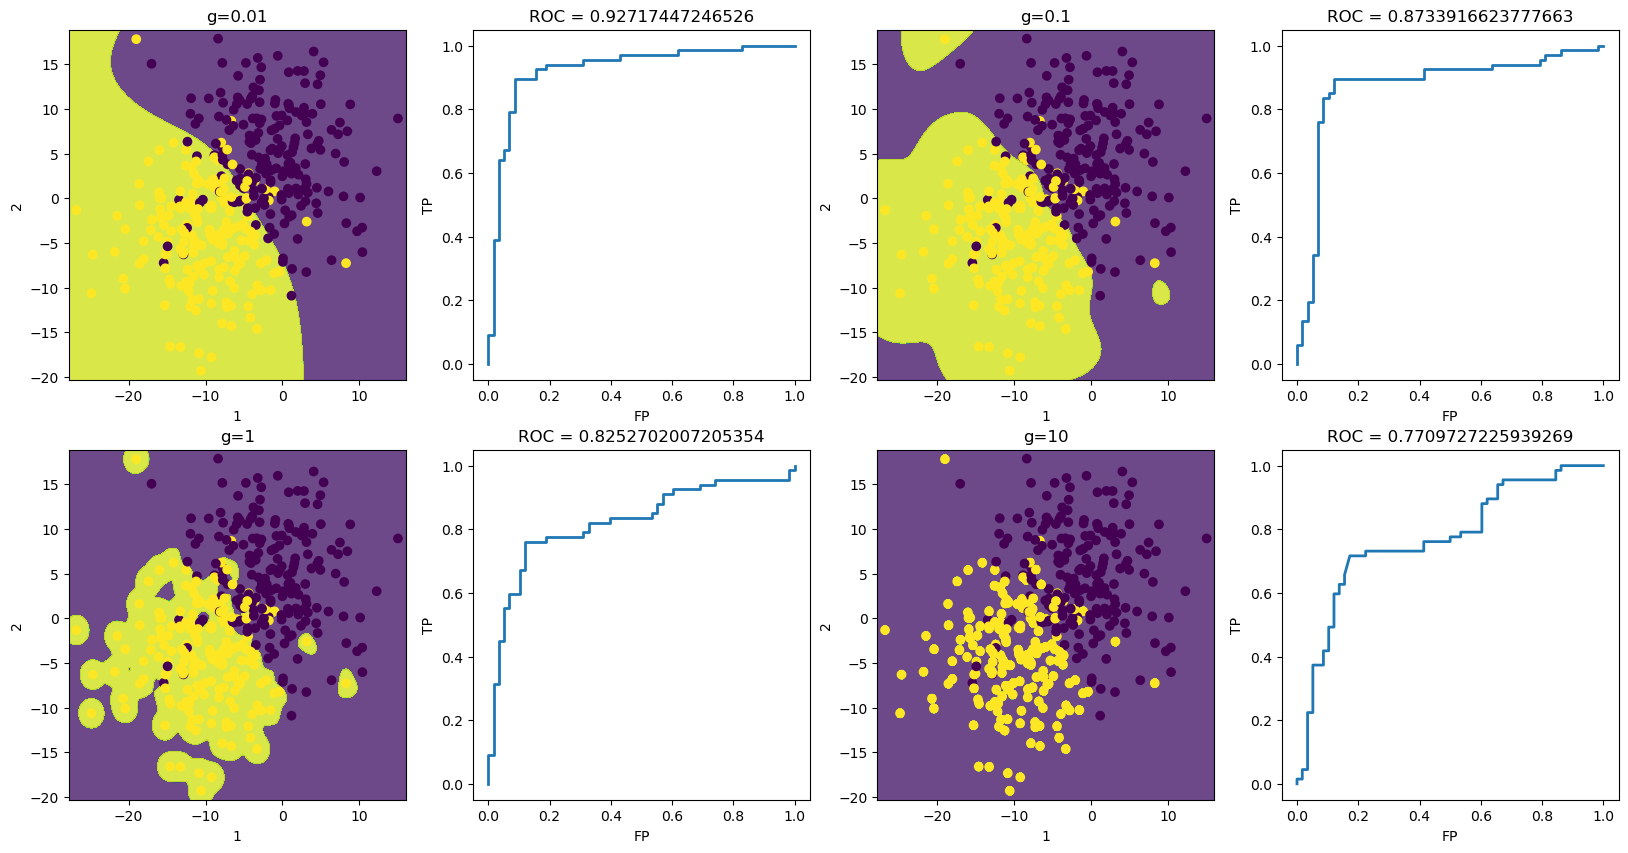

In [18]:
wariancja = [0.01, 0.1, 1, 10]
ilosc_rzedow = int(np.ceil(len(wariancja) / 2))

plt.figure(figsize=(20, ilosc_rzedow * 5))
for i, g in enumerate(wariancja):
    print(g)
    svc = svm.SVC(kernel='rbf', gamma=g)
    y_score = svc.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    area = auc(fpr, tpr)

    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(ilosc_rzedow, 4, (2*i) + 1)
    plt.xlabel('1')
    plt.ylabel('2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'g={g}')

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

    plt.subplot(ilosc_rzedow, 4, (2*i) + 2)
    plt.xlabel('FP')
    plt.ylabel('TP')
    plt.title(f'ROC = {area}')

    plt.plot(fpr, tpr, lw=2)

plt.show()

Najlepszy model uzyskaliśmy przy współczynniku g = 0.01, mozna zauważyć że im większe jest g tym mniejsze jest pole pod krzywą ROC. 

W ciągu całego ćwiczenia najlepsze rezultaty uzyskaliśmy dla svm.LinearSVC przy współczynnikach C = 0.1 i C = 1.